In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import urllib.request
import io

In [14]:
SHAPEFILE_PATH = "./shapefiles/ne_50m_admin_0_countries.shp"  # Chemin vers le shapefile
# Charger le shapefile
world = gpd.read_file(SHAPEFILE_PATH)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [15]:
CAN_QUALIFIERS = {
    "Morocco", "Burkina Faso", "Cameroon", "Algeria", "Senegal", "Angola",
    "Democratic Republic of the Congo", "Egypt", "Equatorial Guinea",
    "Ivory Coast", "South Africa", "Uganda", "Gabon", "Tunisia", "Nigeria",
    "Mali", "Zimbabwe", "Zambia", "Comoros", "Benin", "Sudan", "Tanzania",
    "Botswana", "Mozambique"
}
COLOR_QUALIFIED = "red"
COLOR_NOT_QUALIFIED = "lightgreen"
TITLE = "CAN Monaco 2025 Qualifiers"

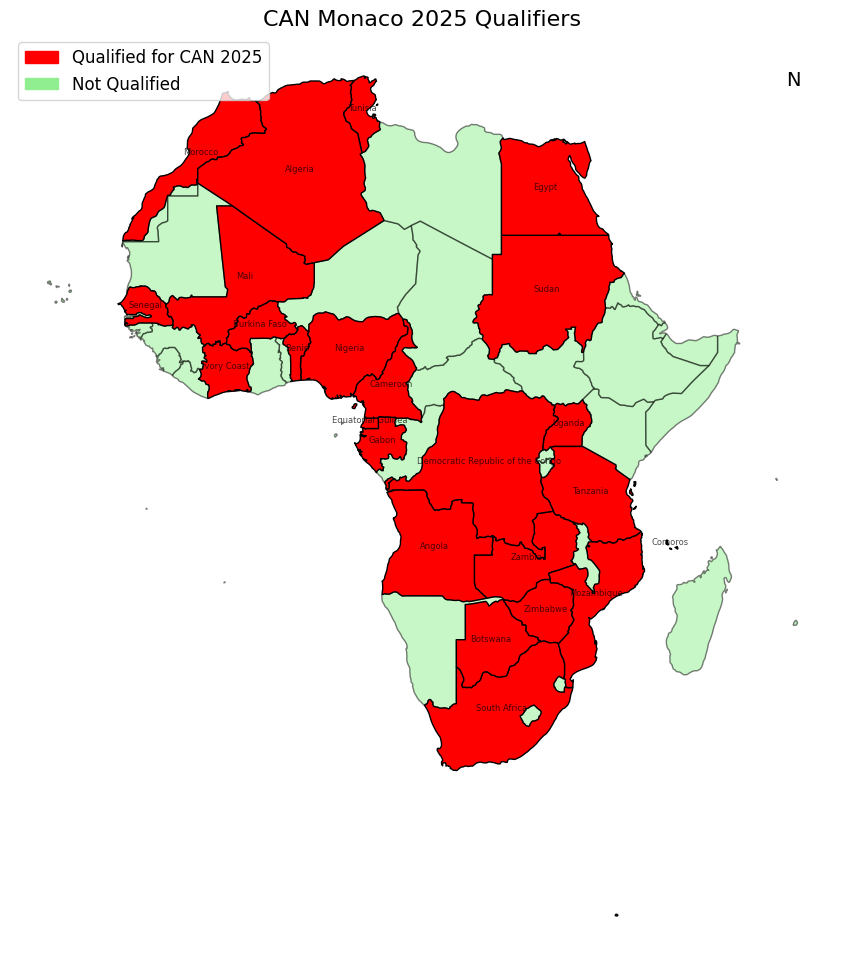

In [16]:
# Filtrer pour les pays d'Afrique
africa = world[world['REGION_UN'] == 'Africa'].copy()

# Ajouter une colonne pour différencier les pays qualifiés
africa["can_status"] = africa["NAME_EN"].apply(lambda x: "Qualified" if x in CAN_QUALIFIERS else "Not Qualified")

# Reprojeter les géométries dans un CRS projeté (exemple: UTM)
africa = africa.to_crs(epsg=3395)  # Projection en mètres

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 12))

# Tracer les pays qualifiés et non qualifiés
africa[africa["can_status"] == "Not Qualified"].plot(ax=ax, color=COLOR_NOT_QUALIFIED, edgecolor="black", alpha=0.5)
africa[africa["can_status"] == "Qualified"].plot(ax=ax, color=COLOR_QUALIFIED, edgecolor="black")

# Personnaliser la carte
ax.set_title(TITLE, fontsize=16)
ax.set_axis_off()  # Supprimer les axes

# Ajouter une légende
handles = [
    mpatches.Patch(color=COLOR_QUALIFIED, label='Qualified for CAN 2025'),
    mpatches.Patch(color=COLOR_NOT_QUALIFIED, label='Not Qualified')
]
ax.legend(handles=handles, loc='upper left', fontsize=12)

# Ajouter les noms des pays qualifiés
for x, y, label in zip(africa.geometry.centroid.x, africa.geometry.centroid.y, africa["NAME_EN"]):
    if label in CAN_QUALIFIERS:
        ax.text(x, y, label, fontsize=6, ha='center', color='black', alpha=0.7)


# Ajouter l'échelle sur la carte


# Ajouter un nord
ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14, color='black', ha='center', va='center')


# Enregistrer l'image en PNG
output_path = "./africa_can_2025_map_with_info.png"
plt.savefig(output_path, format='png', dpi=300)

# Afficher la carte
plt.show()
